In [5]:
import sys
print(sys.executable)


c:\Users\av979\anaconda3\envs\profiling-env\python.exe


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 

In [7]:
housing = fetch_california_housing() # isme data dictionary ke form m store hai as a key value pair
print(housing.keys())
print(housing.target_names)
print(housing.feature_names)
print(housing.DESCR)
df = pd.DataFrame(housing.data , columns=housing.feature_names)
df['HouseValue'] = housing.target

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The tar

In [8]:
df.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### All columns are of float type , no categorical column is present (no encoding required)

In [10]:
df.isnull().sum().sum()

np.int64(0)

### No columns have any null values

In [11]:
df.duplicated().sum() # if df.duplicated() --> ye ek true/false ki boolean series return krta

np.int64(0)

### No duplicate rows are present

In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### There is a very high standard deviation in population , aveoccup , averooms . It is due to variation of size of the block group <br> <br>

# VISUALISATION

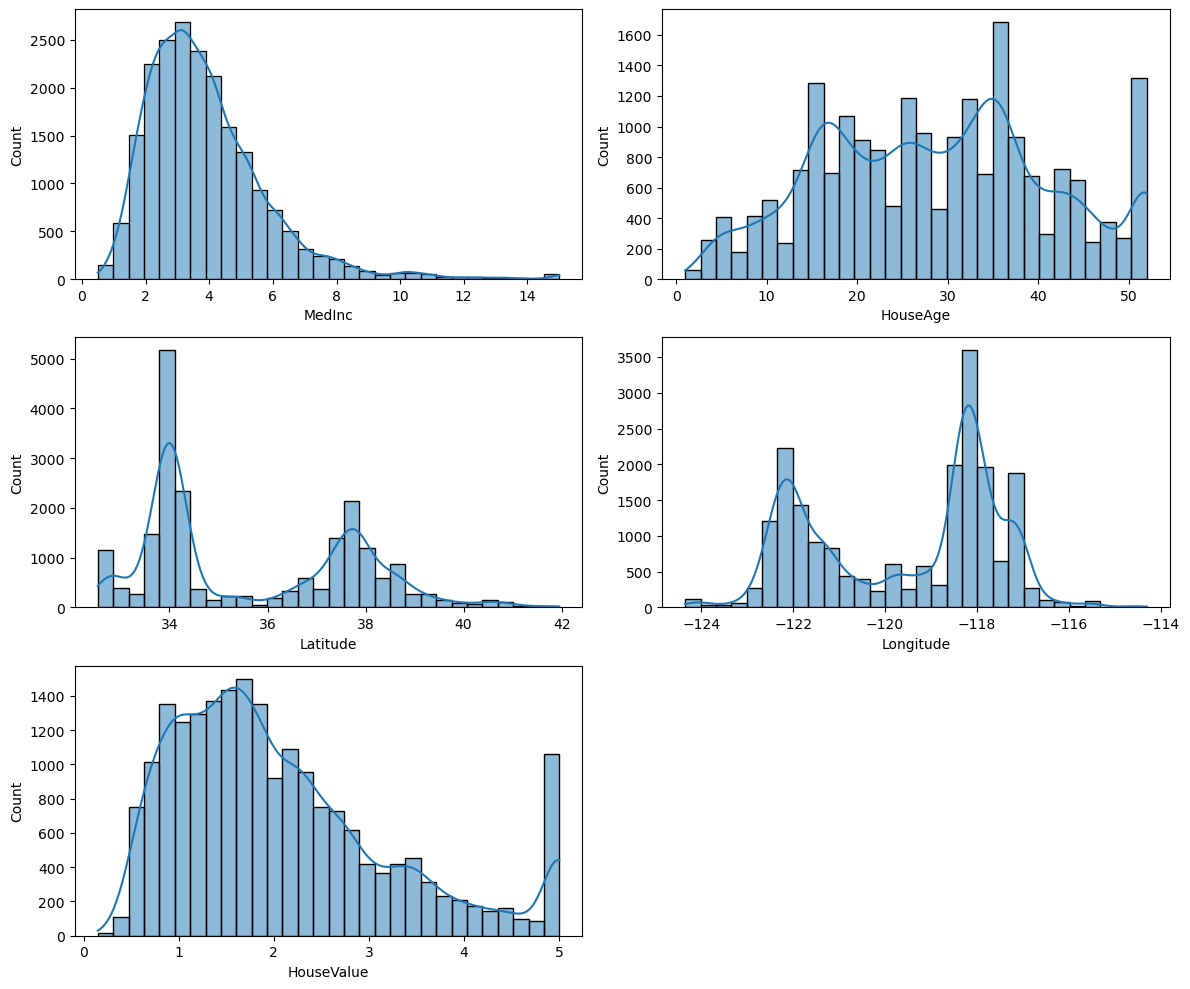

In [13]:
columns = ['MedInc' , 'HouseAge' , 'Latitude' , 'Longitude' ,'HouseValue']
plt.figure(figsize=(12,10))
j = 1
for i in columns:
    plt.subplot(3,2,j)
    sns.histplot( df[i] , bins = 30 , kde = True)
    j+=1
    plt.tight_layout()

### The median income of block group is rightly skewed i.e, some block group have high MedInc 
### Most of the block group house's average age is in b/w 15 and 35
### Most of the houses have latitude of 34 North (southern california {near los angeles})
### Most houses have -118 longitude (West Coast of US(LA region))
### Most house have price range in b/w $50,000 to 250,000

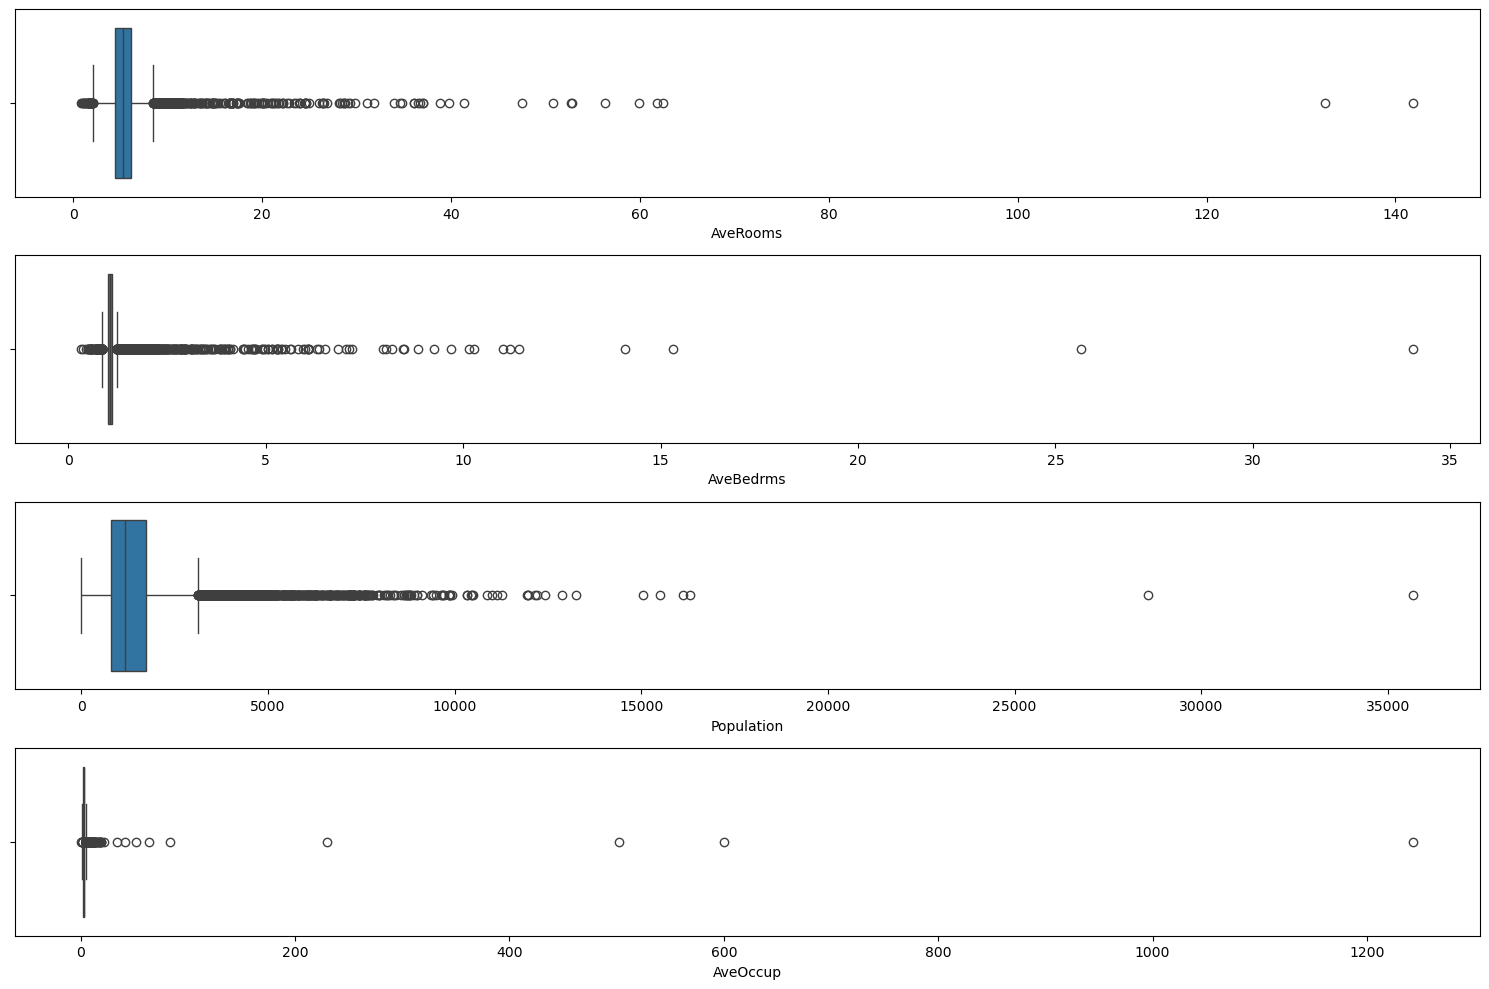

In [14]:
columns1 = ['AveRooms' , 'AveBedrms' , 'Population' , 'AveOccup']
plt.figure(figsize=(15,10))
j=1
for i in columns1:
    plt.subplot(4,1,j)
    sns.boxplot( x= df[i])
    j+=1
    plt.tight_layout()

### There are lot of outliers present in AveRooms , AveBedrms , Population (We can treat it by Robust Scaling)

<Axes: >

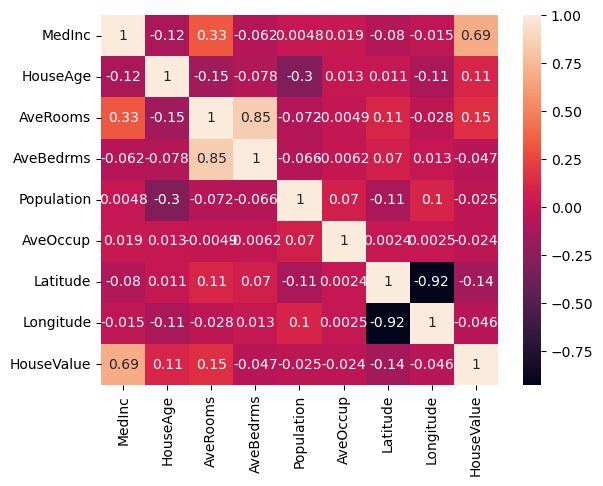

In [15]:
sns.heatmap(df.corr() , annot = True )

### Housevalue is majorily dependent on MedianIncome & little on HouseAge & AveRooms

<Axes: xlabel='MedInc', ylabel='HouseValue'>

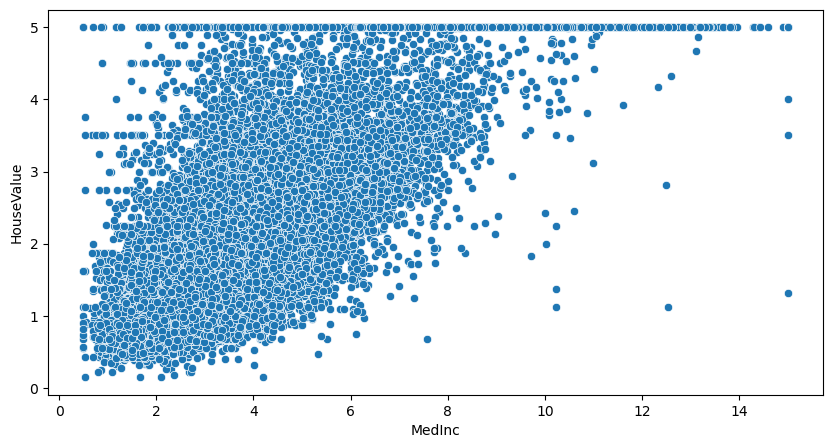

In [16]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df , x = 'MedInc' , y = 'HouseValue')

### Most of the HouseValue data is linearly dependent on MedianIncome

In [17]:
X = df.drop('HouseValue' , axis = 1)
y = df['HouseValue']
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42) # random state ka use hmne hr baar train aur test data ko same rkhne ke liye kiya hai 
#Standardized the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   # the model shouldn't see test data during scaling -> data ko leakage se bchayega
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(16512, 8) (4128, 8)
(16512,) (4128,)


In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train , y_train)
reg_pred = regression.predict(X_test)

<Axes: xlabel='HouseValue', ylabel='Density'>

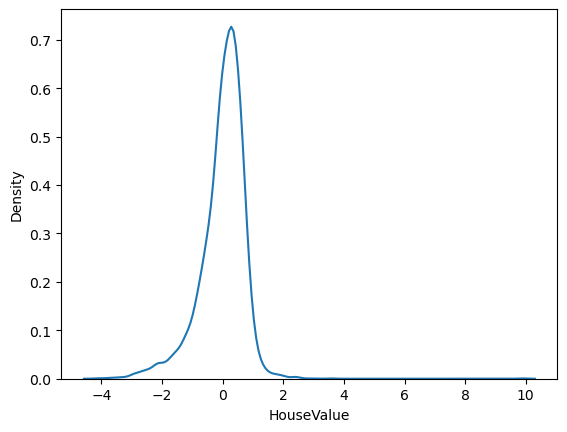

In [20]:
# seaborn visualisation 
sns.kdeplot(reg_pred - y_test)

In [21]:
from sklearn.metrics import r2_score , mean_squared_error
score1 = r2_score(y_test, reg_pred) # hm test aur predicted values ka order nhi chnage kr skte kyuki metrics store order valuesw
print(score1)
score2 = mean_squared_error(y_test , reg_pred)
print(score2) 

0.5757877060324512
0.5558915986952438
